In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
import pandas as pd
b = pd.read_csv("b_features_2.csv")
print(b.size)
#lx = lx[(lx["eta_error_s"] <= 1000) | (lx["pred_eta_s"] <= 60)]
#lx = lx[lx["eta_error_s"] <= 1100]
print(b.size)

6346605
6346605


In [54]:
y = b["eta_error_s"].dropna()

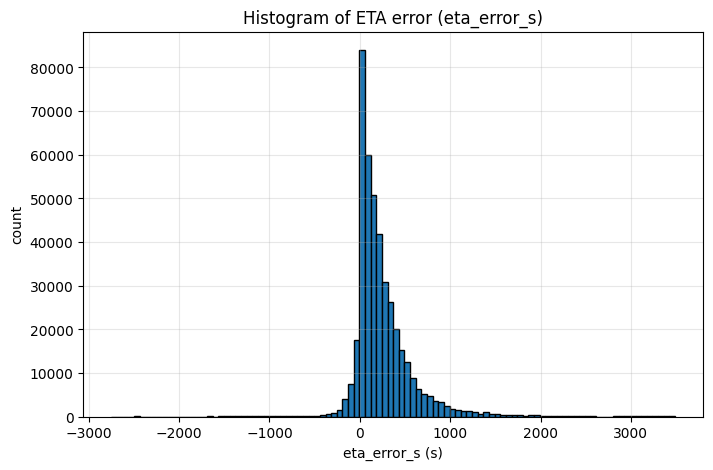

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(y, bins=100, color="C0", edgecolor="black")
plt.xlabel("eta_error_s (s)")
plt.ylabel("count")
plt.title("Histogram of ETA error (eta_error_s)")
plt.grid(alpha=0.3)
plt.show()

In [79]:
def series_without_outliers(series, k=1.5):
    s = series.dropna()
    q1, q3 = np.percentile(s, [25, 75])
    iqr = q3 - q1
    low, high = q1 - k * iqr, q3 + k * iqr
    return series.between(low, high) | series.isna()
clean = b.copy()
eta_error_no_outliers = series_without_outliers(clean["eta_error_s"], k=1.5)
speed_no_outliers = series_without_outliers(clean["speed_1min_mps"], k=1.5)
clean = clean[eta_error_no_outliers & speed_no_outliers].reset_index(drop=True)

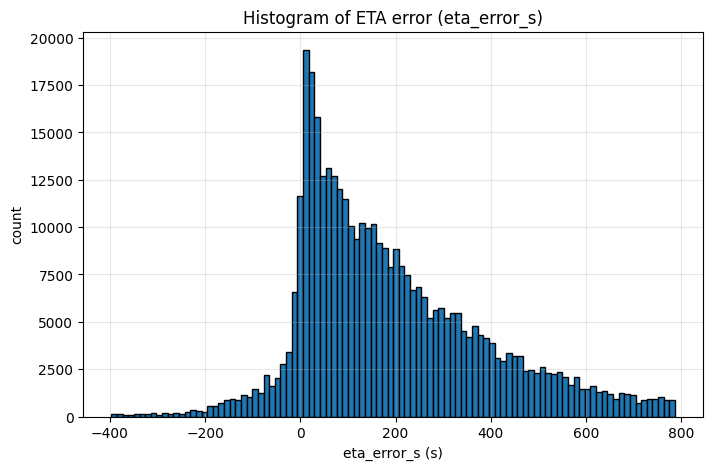

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.hist(clean["eta_error_s"], bins=100, color="C0", edgecolor="black")
plt.xlabel("eta_error_s (s)")
plt.ylabel("count")
plt.title("Histogram of ETA error (eta_error_s)")
plt.grid(alpha=0.3)
plt.show()

In [ ]:
b_sample = clean.sample(n=10000, random_state=42)
y_sample = b_sample["eta_error_s"].dropna()

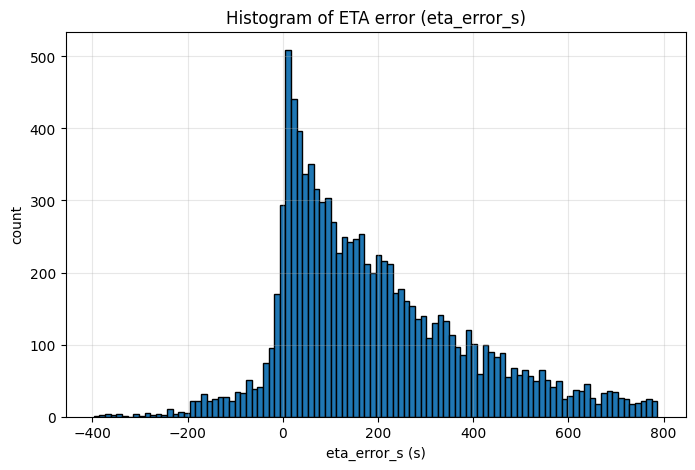

In [82]:
plt.figure(figsize=(8,5))
plt.hist(y_sample, bins=100, color="C0", edgecolor="black")
plt.xlabel("eta_error_s (s)")
plt.ylabel("count")
plt.title("Histogram of ETA error (eta_error_s)")
plt.grid(alpha=0.3)
plt.show()

In [ ]:
paired = b_sample[["pred_eta_s", "eta_error_s"]].dropna()
x_sample = paired["pred_eta_s"]
y_sample = paired["eta_error_s"]

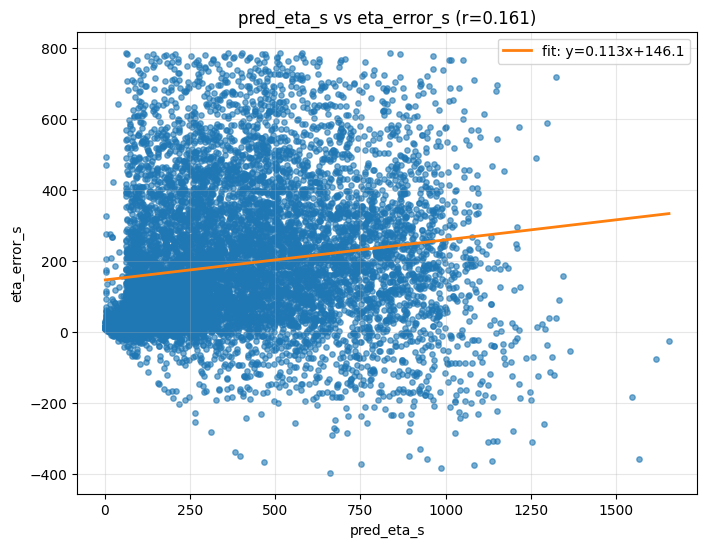

In [84]:
x = x_sample.values
y = y_sample.values

plt.figure(figsize=(8,6))
plt.scatter(x, y, s=15, alpha=0.6, color="C0")
# add simple linear fit if enough points
if x.size > 1:
    mask = np.isfinite(x) & np.isfinite(y)
    if mask.sum() > 1:
        z = np.polyfit(x[mask], y[mask], 1)
        p = np.poly1d(z)
        xs = np.linspace(np.nanmin(x[mask]), np.nanmax(x[mask]), 100)
        plt.plot(xs, p(xs), color="C1", lw=2, label=f"fit: y={z[0]:.3f}x+{z[1]:.1f}")

# correlation coefficient
r = np.corrcoef(x[mask], y[mask])[0,1] if mask.sum() > 1 else np.nan
plt.xlabel("pred_eta_s")
plt.ylabel("eta_error_s")
plt.title(f"pred_eta_s vs eta_error_s (r={r:.3f})")
plt.grid(alpha=0.3)
plt.legend(loc="best")
plt.show()

In [ ]:
paired = b_sample[["pax_load", "eta_error_s"]].dropna()
x_sample = paired["pax_load"]
y_sample = paired["eta_error_s"]

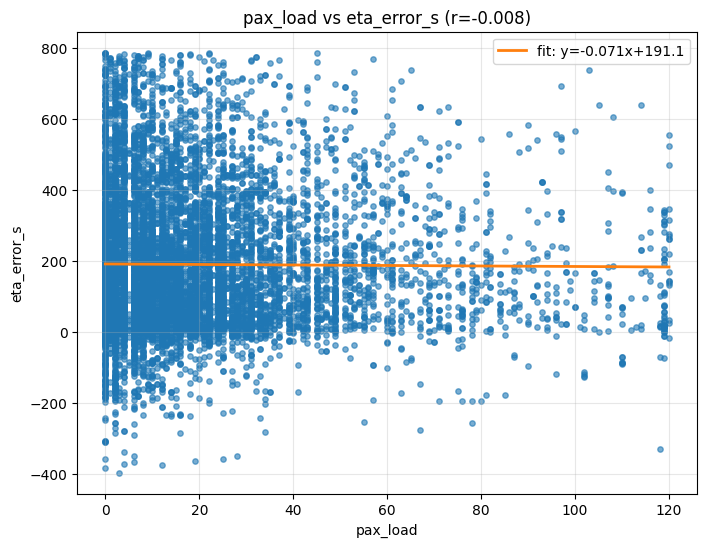

In [86]:
x = x_sample.values
y = y_sample.values

plt.figure(figsize=(8,6))
plt.scatter(x, y, s=15, alpha=0.6, color="C0")
# add simple linear fit if enough points
if x.size > 1:
    mask = np.isfinite(x) & np.isfinite(y)
    if mask.sum() > 1:
        z = np.polyfit(x[mask], y[mask], 1)
        p = np.poly1d(z)
        xs = np.linspace(np.nanmin(x[mask]), np.nanmax(x[mask]), 100)
        plt.plot(xs, p(xs), color="C1", lw=2, label=f"fit: y={z[0]:.3f}x+{z[1]:.1f}")

# correlation coefficient
r = np.corrcoef(x[mask], y[mask])[0,1] if mask.sum() > 1 else np.nan
plt.xlabel("pax_load")
plt.ylabel("eta_error_s")
plt.title(f"pax_load vs eta_error_s (r={r:.3f})")
plt.grid(alpha=0.3)
plt.legend(loc="best")
plt.show()

In [ ]:
paired = b_sample[["speed_prev_mps", "eta_error_s"]].dropna()
#paired = paired[paired["speed_prev_mps"] < 40]
x_sample = paired["speed_prev_mps"]
y_sample = paired["eta_error_s"]

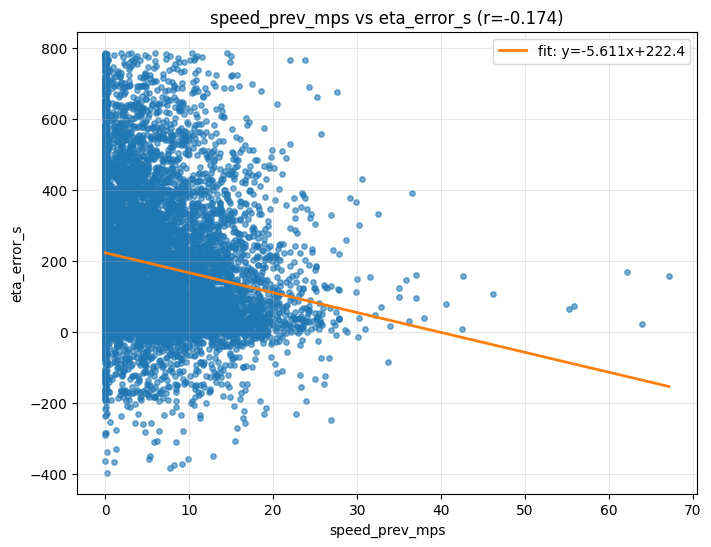

In [88]:
x = x_sample.values
y = y_sample.values

plt.figure(figsize=(8,6))
plt.scatter(x, y, s=15, alpha=0.6, color="C0")
# add simple linear fit if enough points
if x.size > 1:
    mask = np.isfinite(x) & np.isfinite(y)
    if mask.sum() > 1:
        z = np.polyfit(x[mask], y[mask], 1)
        p = np.poly1d(z)
        xs = np.linspace(np.nanmin(x[mask]), np.nanmax(x[mask]), 100)
        plt.plot(xs, p(xs), color="C1", lw=2, label=f"fit: y={z[0]:.3f}x+{z[1]:.1f}")

# correlation coefficient
r = np.corrcoef(x[mask], y[mask])[0,1] if mask.sum() > 1 else np.nan
plt.xlabel("speed_prev_mps")
plt.ylabel("eta_error_s")
plt.title(f"speed_prev_mps vs eta_error_s (r={r:.3f})")
plt.grid(alpha=0.3)
plt.legend(loc="best")
plt.show()

In [ ]:
paired = b_sample[["speed_1min_mps", "eta_error_s"]].dropna()
paired = paired[paired["speed_1min_mps"] < 30]
x_sample = paired["speed_1min_mps"]
y_sample = paired["eta_error_s"]

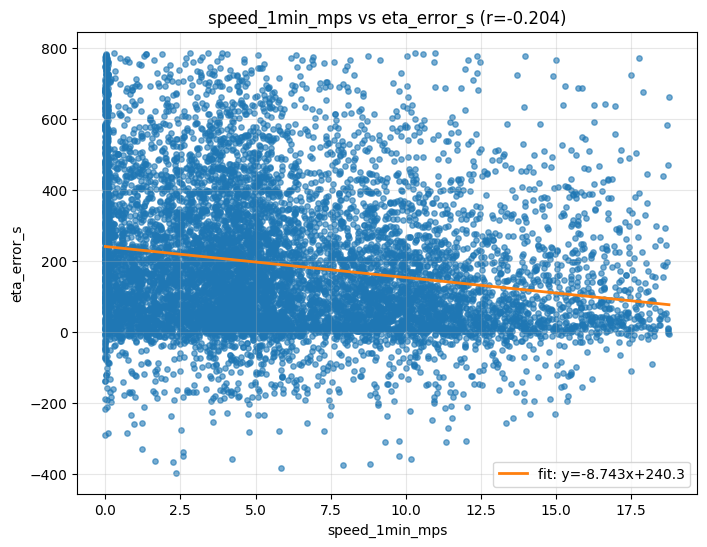

In [90]:
x = x_sample.values
y = y_sample.values

plt.figure(figsize=(8,6))
plt.scatter(x, y, s=15, alpha=0.6, color="C0")
# add simple linear fit if enough points
if x.size > 1:
    mask = np.isfinite(x) & np.isfinite(y)
    if mask.sum() > 1:
        z = np.polyfit(x[mask], y[mask], 1)
        p = np.poly1d(z)
        xs = np.linspace(np.nanmin(x[mask]), np.nanmax(x[mask]), 100)
        plt.plot(xs, p(xs), color="C1", lw=2, label=f"fit: y={z[0]:.3f}x+{z[1]:.1f}")

# correlation coefficient
r = np.corrcoef(x[mask], y[mask])[0,1] if mask.sum() > 1 else np.nan
plt.xlabel("speed_1min_mps")
plt.ylabel("eta_error_s")
plt.title(f"speed_1min_mps vs eta_error_s (r={r:.3f})")
plt.grid(alpha=0.3)
plt.legend(loc="best")
plt.show()

In [ ]:
paired = b_sample[["time_of_day_s", "eta_error_s"]].dropna()
x_sample = paired["time_of_day_s"]
x_sample = (x_sample + 86400 - 60*60*11) % (86400)
y_sample = paired["eta_error_s"]

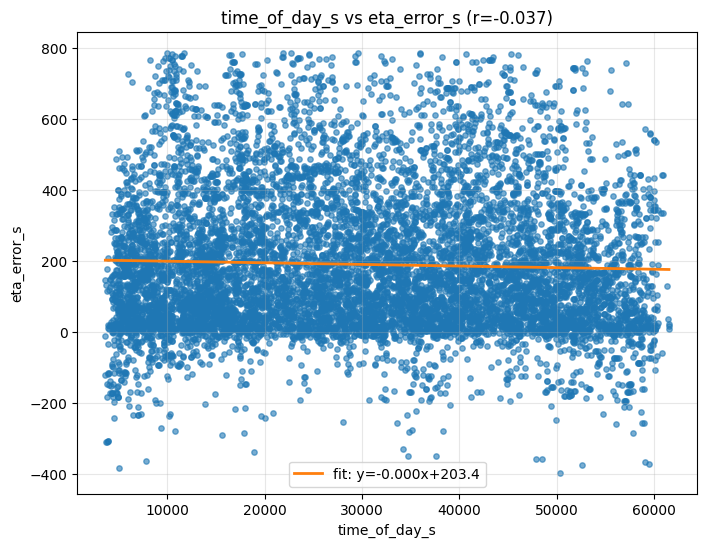

In [92]:
x = x_sample.values
y = y_sample.values

plt.figure(figsize=(8,6))
plt.scatter(x, y, s=15, alpha=0.6, color="C0")
# add simple linear fit if enough points
if x.size > 1:
    mask = np.isfinite(x) & np.isfinite(y)
    if mask.sum() > 1:
        z = np.polyfit(x[mask], y[mask], 1)
        p = np.poly1d(z)
        xs = np.linspace(np.nanmin(x[mask]), np.nanmax(x[mask]), 100)
        plt.plot(xs, p(xs), color="C1", lw=2, label=f"fit: y={z[0]:.3f}x+{z[1]:.1f}")

# correlation coefficient
r = np.corrcoef(x[mask], y[mask])[0,1] if mask.sum() > 1 else np.nan
plt.xlabel("time_of_day_s")
plt.ylabel("eta_error_s")
plt.title(f"time_of_day_s vs eta_error_s (r={r:.3f})")
plt.grid(alpha=0.3)
plt.legend(loc="best")
plt.show()